# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 602


['georgiyevka',
 'mataura',
 'ushuaia',
 'atuona',
 'minsk',
 'north bend',
 'rikitea',
 'cairns',
 'bambous virieux',
 'chapais',
 'san carlos de bariloche',
 'jamestown',
 'east london',
 'raudeberg',
 'punta arenas',
 'victoria',
 'cape town',
 'saint-augustin',
 'hilo',
 'taolanaro',
 'faanui',
 'avera',
 'miramar',
 'mentok',
 'attawapiskat',
 'mar del plata',
 'wattegama',
 'bengkulu',
 'barrow',
 'hithadhoo',
 'souillac',
 'sakskobing',
 'matadi',
 'kalmunai',
 'bachaquero',
 'vardo',
 'luderitz',
 'kavieng',
 'bethel',
 'cidreira',
 'illoqqortoormiut',
 'kaduna',
 'badarwas',
 'bluff',
 'beringovskiy',
 'bousso',
 'busselton',
 'mount isa',
 'umzimvubu',
 'lixourion',
 'mahebourg',
 'amderma',
 'suzu',
 'saint-philippe',
 'juneau',
 'verkhnevilyuysk',
 'fort nelson',
 'launceston',
 'marsa matruh',
 'hobart',
 'victor harbor',
 'palu',
 'chuy',
 'maarianhamina',
 'georgetown',
 'grand gaube',
 'viedma',
 'karasuk',
 'wanning',
 'gizo',
 'vaini',
 'kerrobert',
 'nikolskoye',
 'm

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgiyevka
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | minsk
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cairns
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | chapais
Processing Record 11 of Set 1 | san carlos de bariloche
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | raudeberg
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | a

Processing Record 32 of Set 4 | severo-kurilsk
Processing Record 33 of Set 4 | carutapera
Processing Record 34 of Set 4 | sao joao da barra
Processing Record 35 of Set 4 | wilmington
Processing Record 36 of Set 4 | provideniya
Processing Record 37 of Set 4 | constitucion
Processing Record 38 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | tual
Processing Record 41 of Set 4 | mount pleasant
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | yashkul
Processing Record 44 of Set 4 | urubicha
Processing Record 45 of Set 4 | blonduos
City not found. Skipping...
Processing Record 46 of Set 4 | lolua
City not found. Skipping...
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | kudahuvadhoo
Processing Record 2 of Set 5 | kinston


Processing Record 27 of Set 8 | mayumba
Processing Record 28 of Set 8 | karlskoga
Processing Record 29 of Set 8 | xghajra
City not found. Skipping...
Processing Record 30 of Set 8 | dujuma
City not found. Skipping...
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | kiamba
Processing Record 33 of Set 8 | kaura namoda
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | kropotkin
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | iquique
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | sur
Processing Record 40 of Set 8 | nyuksenitsa
Processing Record 41 of Set 8 | bansi
Processing Record 42 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 43 of Set 8 | ternate
Processing Record 44 of Set 8 | taoudenni
Processing Record 45 of Set 8 | havre-saint-pierre
Processing Record 46 of Set 8 | gravdal
Processing Record 47 of Set 8 | wschowa
Processing Record 48 of Set 8 | yabelo
Processing Record

Processing Record 17 of Set 12 | northam
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | fredericksburg
Processing Record 21 of Set 12 | ust-koksa
Processing Record 22 of Set 12 | new iberia
Processing Record 23 of Set 12 | punta de bombon
Processing Record 24 of Set 12 | sao luis de montes belos
Processing Record 25 of Set 12 | hirara
Processing Record 26 of Set 12 | olga
Processing Record 27 of Set 12 | gaoua
Processing Record 28 of Set 12 | natchitoches
Processing Record 29 of Set 12 | itarema
Processing Record 30 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 31 of Set 12 | ola
Processing Record 32 of Set 12 | abay
Processing Record 33 of Set 12 | moerai
Processing Record 34 of Set 12 | kawalu
Processing Record 35 of Set 12 | garden city
Processing Record 36 of Set 12 | hambantota
Processing Record 37 of Set 12 | rafraf
Processing Record 38 of Set 12 | grenchen
Processing Record 39 of Set 12 | shahr

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgiyevka,43.0369,74.7114,23.04,63,0,2.24,KZ,1669663624
1,mataura,-46.1927,168.8643,52.32,80,100,1.81,NZ,1669663501
2,ushuaia,-54.8000,-68.3000,67.66,30,75,12.66,AR,1669663502
3,atuona,-9.8000,-139.0333,77.83,73,12,14.72,PF,1669663506
4,minsk,53.9000,27.5667,28.15,98,100,5.28,BY,1669663294


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=True, header=True, index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgiyevka,43.0369,74.7114,23.04,63,0,2.24,KZ,1669663624
1,mataura,-46.1927,168.8643,52.32,80,100,1.81,NZ,1669663501
2,ushuaia,-54.8000,-68.3000,67.66,30,75,12.66,AR,1669663502
3,atuona,-9.8000,-139.0333,77.83,73,12,14.72,PF,1669663506
4,minsk,53.9000,27.5667,28.15,98,100,5.28,BY,1669663294


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

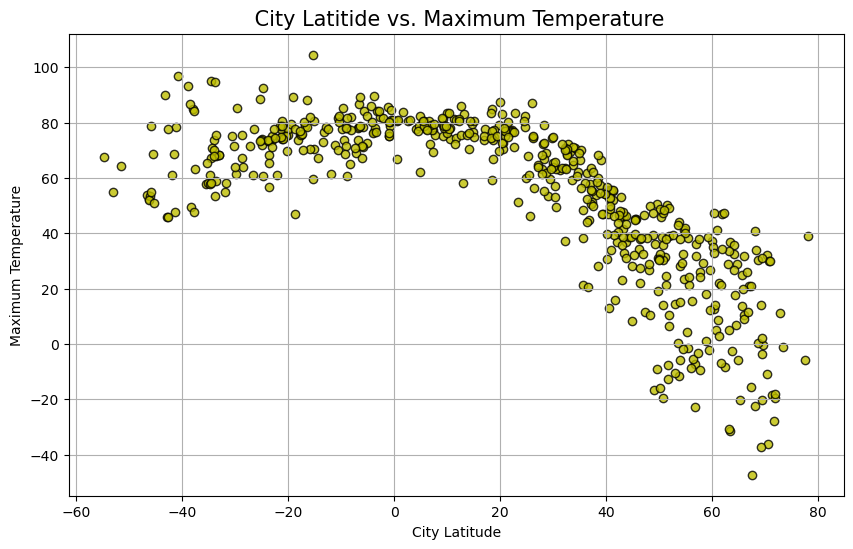

In [30]:
# Build scatter plot for latitude vs. temperature
x_axis_1 = city_data_df["Lat"]
y_axis_1 = city_data_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_1, y_axis_1, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitude vs. Maximum Temperature",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature")
plt.grid()
#plt.xlim(0,85)
#plt.ylim(-60,90)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1 (Lat vs. Temp).png")

# Show plot
plt.show()

**Analysis**

From the scatter plot, it shows the correlation between city latitude and maximum temperature which can summerize latitudes tend to be in negative values with higher temperature.

The plot also shows temperature drops while moving away from the equator. 


#### Latitude Vs. Humidity

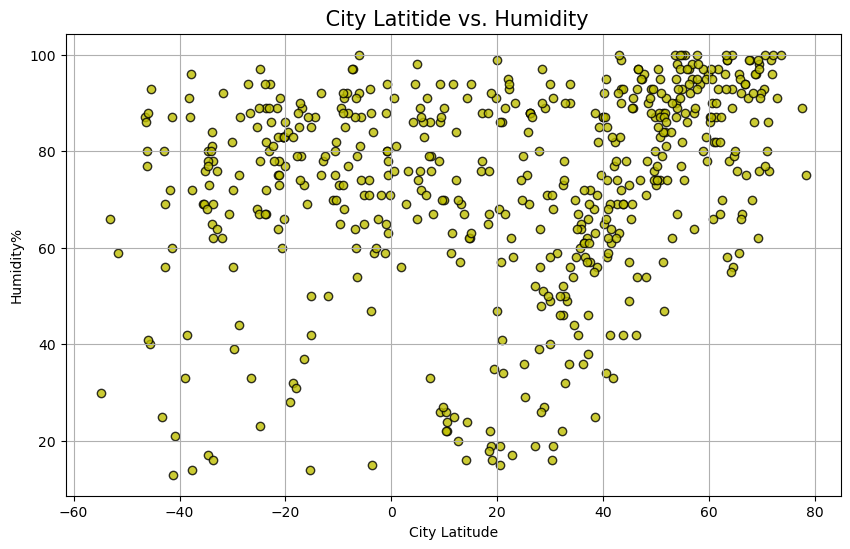

In [31]:
# Build the scatter plots for latitude vs. humidity
x_axis_2 = city_data_df["Lat"]
y_axis_2 = city_data_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Humidity",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Humidity%")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2 (Lat vs. Humid).png")

# Show plot
plt.show()

**Analysis**

The scatter plot shows higher latitude has higher humidity

#### Latitude Vs. Cloudiness

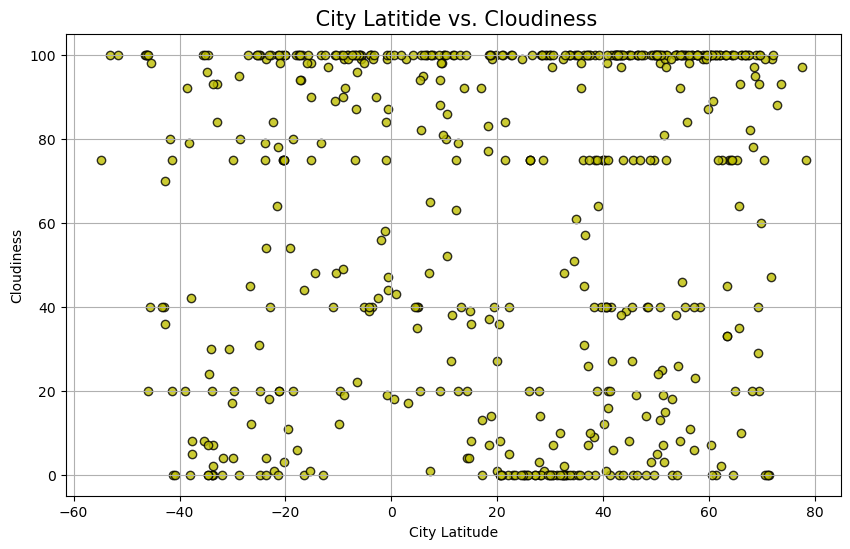

In [32]:
# Build the scatter plots for latitude vs. humidity
x_axis_3 = city_data_df["Lat"]
y_axis_3 = city_data_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_3, y_axis_3, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Cloudiness",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3 (Lat vs. cloudiness).png")

# Show plot
plt.show()

** Analysis ** 

The scatter plot shows no pattern to describe the correlation between latitude and cloudiness as the data entries are widely spread. 

#### Latitude vs. Wind Speed Plot

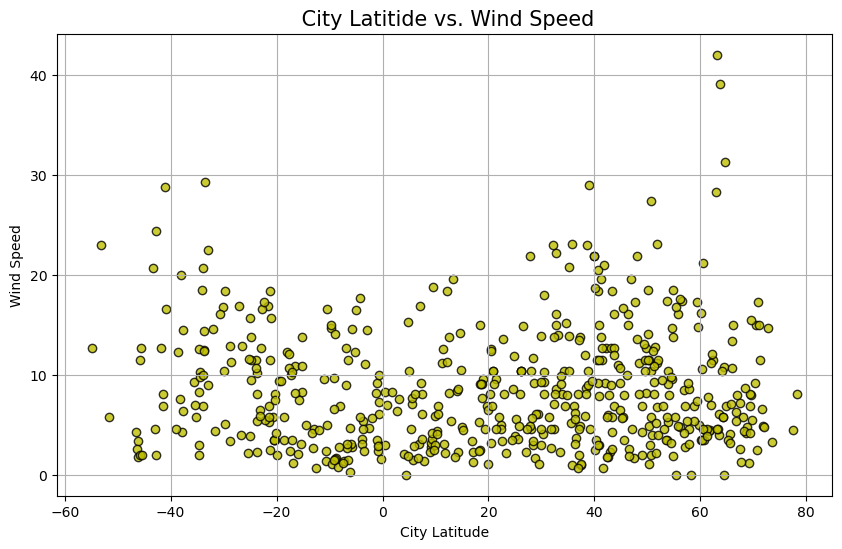

In [33]:
# Build the scatter plots for latitude vs. humidity
x_axis_4 = city_data_df["Lat"]
y_axis_4 = city_data_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_4, y_axis_4, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Wind Speed",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4 (Lat vs. Wind Speed).png")

# Show plot
plt.show()

** Analysis **

The scatter plot shows no pattern to describe the correlation between latitude and wind speed as the data entries are widely spread.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgiyevka,43.0369,74.7114,23.04,63,0,2.24,KZ,1669663624
4,minsk,53.9000,27.5667,28.15,98,100,5.28,BY,1669663294
5,north bend,43.4065,-124.2243,46.24,93,100,18.41,US,1669663538
9,chapais,49.7834,-74.8492,19.18,87,100,8.21,CA,1669663624
11,jamestown,42.0970,-79.2353,37.02,77,100,9.22,US,1669663501


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,52.32,80,100,1.81,NZ,1669663501
2,ushuaia,-54.8000,-68.3000,67.66,30,75,12.66,AR,1669663502
3,atuona,-9.8000,-139.0333,77.83,73,12,14.72,PF,1669663506
6,rikitea,-23.1203,-134.9692,73.56,80,18,6.44,PF,1669663508
7,cairns,-16.9167,145.7667,78.75,89,100,1.14,AU,1669663624


#### Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere

The r-squared is: 0.7089254935291356


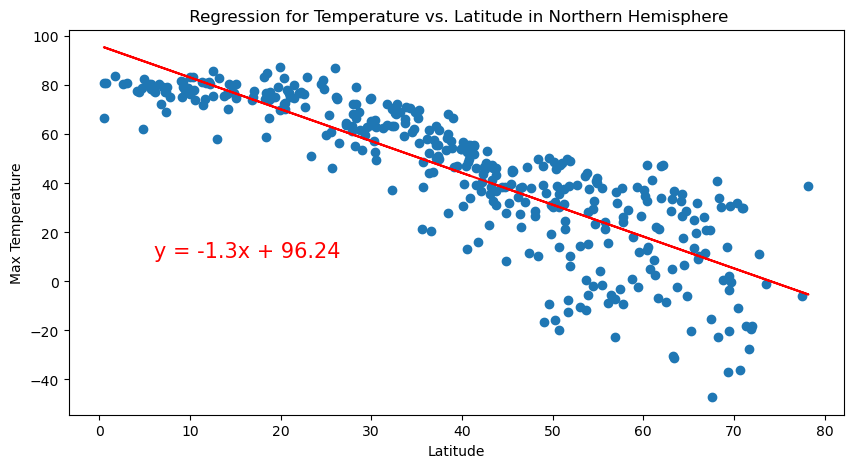

In [36]:
# Linear regression on Northern Hemisphere
x_axis_5 = northern_hemi_df["Lat"]
y_axis_5 = northern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_5, y_axis_5)
regress_values = x_axis_5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_5,y_axis_5)

# Plot regression line
plt.plot(x_axis_5,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Temperature vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot shows latitudes away from the equator the temperature decreases and there is a strong correlation between temperature and latitude in Northern Hemisphere

#### Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere

The r-squared is: 0.20532941764680585


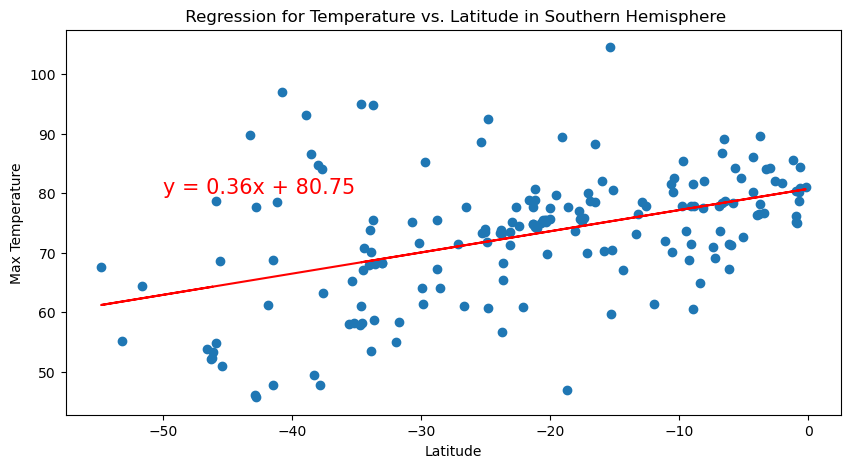

In [37]:
# Linear regression on Southern Hemisphere
x_axis_6 = southern_hemi_df["Lat"]
y_axis_6 = southern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_6, y_axis_6)
regress_values = x_axis_6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_6,y_axis_6)

# Plot regression line
plt.plot(x_axis_6,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Temperature vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot shows latitudes close to the equator, the temperature increases and there is a weak correlation between temperature and latitude in Southern Hemisphere

####  Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere 

The r-squared is: 0.1636231783338876


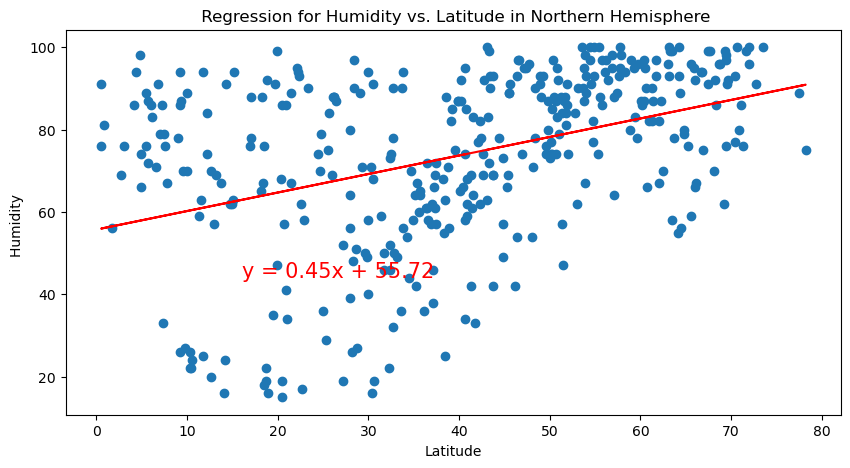

In [38]:
x_axis_7 = northern_hemi_df["Lat"]
y_axis_7 = northern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_7, y_axis_7)
regress_values = x_axis_7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_7,y_axis_7)

# Plot regression line
plt.plot(x_axis_7,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Humidity vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between humidity and latitude in Northern Hemispere

####  Humidity vs. Latitude Linear Regression Plot - Southern Hemisphere 

The r-squared is: 0.044515360055777824


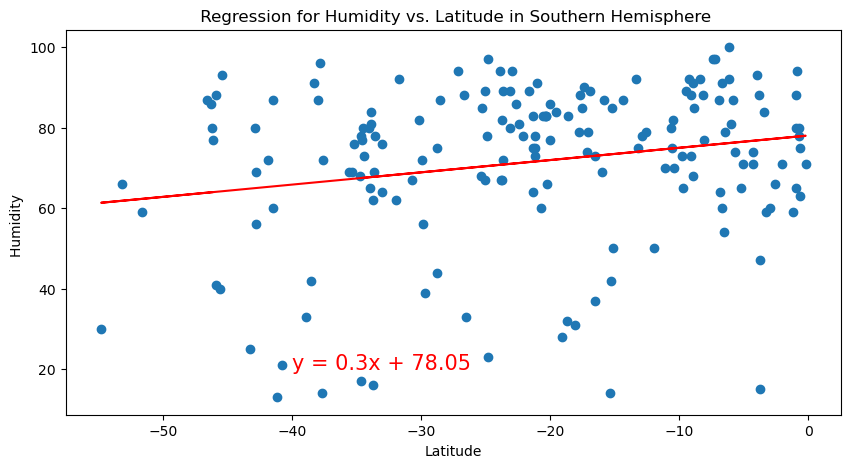

In [39]:
x_axis_8 = southern_hemi_df["Lat"]
y_axis_8 = southern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_8, y_axis_8)
regress_values = x_axis_8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_8,y_axis_8)

# Plot regression line
plt.plot(x_axis_8,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Humidity vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between humidity and latitude in Southern Hemispere

#### Cloudiness vs. Latitude Linear Regression Plot - Northern Hemisphere

The r-squared is: 0.01783051089346642


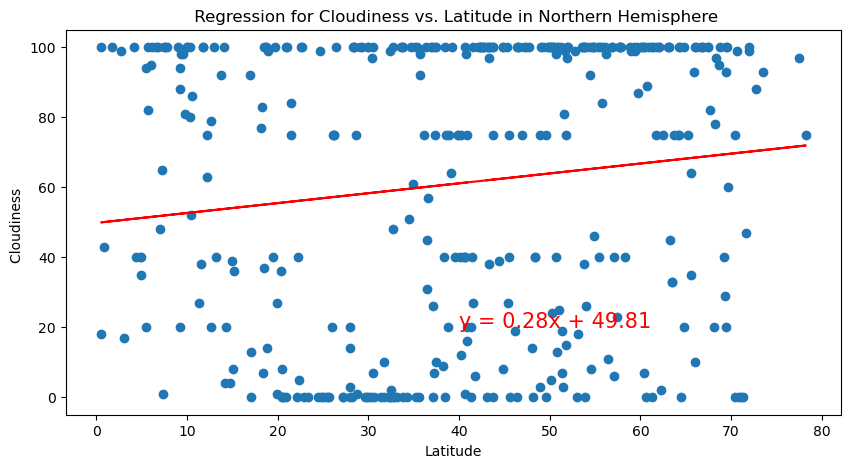

In [40]:
# Northern Hemisphere
x_axis_9 = northern_hemi_df["Lat"]
y_axis_9 = northern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_9, y_axis_9)
regress_values = x_axis_9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_9,y_axis_9)

# Plot regression line
plt.plot(x_axis_9,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Cloudiness vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between cloudiness and latitude in Northern Hemispere

#### Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere

The r-squared is: 0.06074799083695794


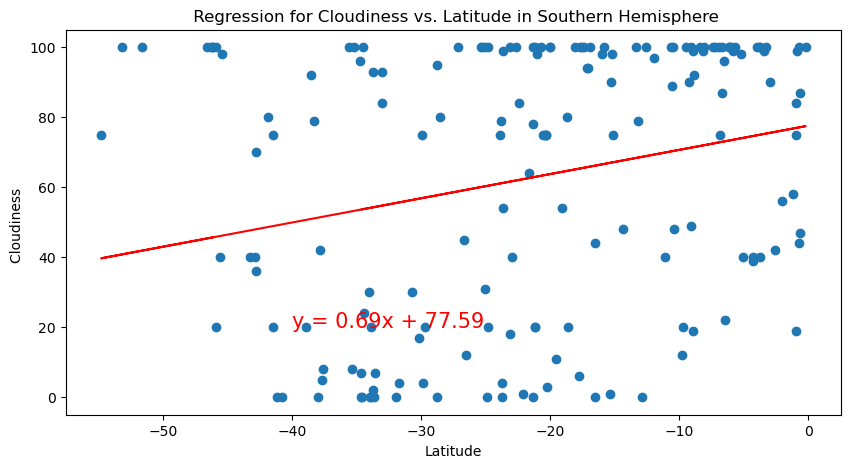

In [41]:
# Southern Hemisphere
x_axis_10 = southern_hemi_df["Lat"]
y_axis_10 = southern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_10, y_axis_10)
regress_values = x_axis_10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_10,y_axis_10)

# Plot regression line
plt.plot(x_axis_10,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Cloudiness vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between cloudiness and latitude in Southern Hemispere

#### Wind Speed vs. Latitude Linear Regression Plot - Northern Hemisphere

The r-squared is: 0.015272941231624539


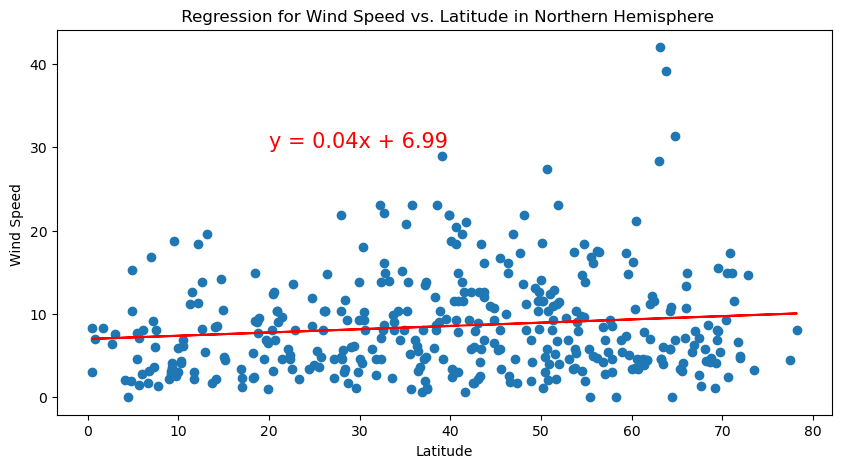

In [42]:
# Northern Hemisphere
x_axis_11 = northern_hemi_df["Lat"]
y_axis_11 = northern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_11, y_axis_11)
regress_values = x_axis_11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_11,y_axis_11)

# Plot regression line
plt.plot(x_axis_11,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Wind Speed vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between wind speed and latitude in Northern Hemispere

#### Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere


The r-squared is: 0.09016008021355833


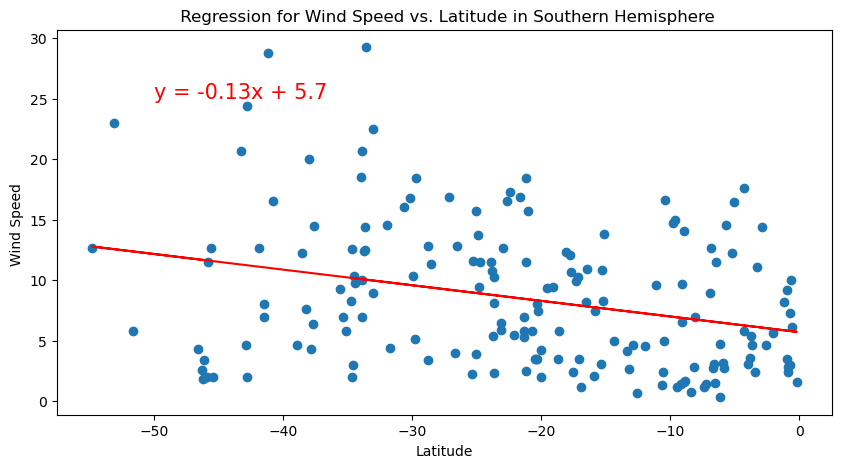

In [43]:
# Southern Hemisphere
x_axis_12 = southern_hemi_df["Lat"]
y_axis_12 = southern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_12, y_axis_12)
regress_values = x_axis_12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_12,y_axis_12)

# Plot regression line
plt.plot(x_axis_12,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Wind Speed vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

** Analysis **

The regression plot does not shows correlation between wind speed and latitude in Southern Hemispere